#  Analizy Igrzysk Olimpijskich Zimowych i Letnich. 
**Projekt grupowy - Języki skryptowe w analizie danych** \
**Wykonali: Wojciech Kubak, Filip Koźlik, Wojciech Harmata**

## Import danych i przegląd podstawowych informacji. \
**Filip Koźlik**

Podstawowe operacje matematyczne.

In [2]:
import numpy as np
import scipy.stats as stats

Wizualizacja danych.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

1. Import biblioteki pandas
2. Ustawienie formatu wyświetlanych float'ów
3. Ustawienie maksymalnej ilości wyświetlanych kolumn

In [4]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 20

Importowanie danych: \
1. Igrzyska letnie -> summer 
2. Igrzyska zimowe -> winter
3. Dodatkowe informacje dotyczące krajów -> dic

In [5]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [6]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


Opis poszczególnych kolumn w pliku __summer.csv__: \
 1.   **City** -> miasto, w którym odbył się turniej       
 2.   **Sport** -> rodzaj sportu      
 3.   **Discipline** -> rodzaj dyscypliny
 4.   **Athlete** -> dane sportowca     
 5.   **Country** -> skrót kraju sportowca     
 6.   **Gender** -> płeć sportowca     
 7.   **Event** -> konkurencja sportowa       
 8.   **Medal** -> zdobyty medal       

In [7]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [8]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


Opis poszczególnych kolumn w pliku __winter.csv__: \
 1.   **City** -> miasto, w którym odbył się turniej       
 2.   **Sport** -> rodzaj sportu      
 3.   **Discipline** -> rodzaj dyscypliny
 4.   **Athlete** -> dane sportowca     
 5.   **Country** -> skrót kraju sportowca     
 6.   **Gender** -> płeć sportowca     
 7.   **Event** -> konkurencja sportowa       
 8.   **Medal** -> zdobyty medal       

In [9]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [10]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.00,594.32
1,Albania,ALB,2889167.00,3945.22
2,Algeria,ALG,39666519.00,4206.03
3,American Samoa*,ASA,55538.00,nan
4,Andorra,AND,70473.00,nan
...,...,...,...,...
196,Vietnam,VIE,91703800.00,2111.14
197,Virgin Islands*,ISV,103574.00,nan
198,Yemen,YEM,26832215.00,1406.29
199,Zambia,ZAM,16211767.00,1304.88


Opis poszczególnych kolumn w pliku __dictionary.csv__: \
 1.   **Country** -> kraj pochodzenia sportowca    
 2.   **Code** -> kod kraju    
 3.   **Population** -> populacja danego kraju
 4.   **GPD per Capita** -> produkt krajowy brutto   


In [11]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


## Scalanie plików csv. \
**Filip Koźlik**

1. Scalenie plików __summer__ i __winter__.
2. Utworzenie dodatkowej kolumny 'Edition' przechowującej dane dotyczące edycji.



In [12]:
olympics = pd.concat([summer, winter],axis = 0, keys = ['Summer', 'Winter'],
                     names = ['Edition']).reset_index().drop('level_1', axis =1)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


Dołączenie do __olympics__ pełnej nazwy kraju, na podstawie klucza Country.

In [13]:
olympics = olympics.merge(dic.iloc[:,:2], how = 'left', left_on= 'Country',  right_on = 'Code').drop('Code', axis =1)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


## Oczyszczanie danych. \
**Wojciech Kubak**

Zmiana nazw wybranych kolumn.

In [14]:
olympics.rename({'GDP per Capita': 'GDP_per_Capita','Country_x': 'Code', 'Country_y': 'Country_name'},
                axis = 1, inplace = True)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_name
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


Utworzenie słownika odwzorowującego pełną nazwę kraju na podstawie kodu.

In [15]:
missing_names = {'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

In [16]:
missing_names = pd.Series(data = missing_names)
missing_names

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
dtype: object

Mapujemy brakujące wartości przy pomocy słownika __missing_names__.

In [17]:
olympics.Country_name.fillna(value = olympics.Code.map(missing_names), inplace = True)

Wyświetlenie rekordów z brakującymi wartościami kolumny Code.

In [18]:
olympics.loc[olympics.Code.isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_name
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


Usuwamy wybrane rekordy, resetujemy index.

In [19]:
olympics.dropna(subset = ['Code'], inplace = True)
olympics.reset_index(drop = True, inplace = True)

Zmiana typu kolumny z 'object' na 'category' w celu zmniejszenia wielkości pliku.

In [20]:
olympics.Medal = olympics.Medal.astype('category')

In [21]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Edition       36931 non-null  object  
 1   Year          36931 non-null  int64   
 2   City          36931 non-null  object  
 3   Sport         36931 non-null  object  
 4   Discipline    36931 non-null  object  
 5   Athlete       36931 non-null  object  
 6   Code          36931 non-null  object  
 7   Gender        36931 non-null  object  
 8   Event         36931 non-null  object  
 9   Medal         36931 non-null  category
 10  Country_name  36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [22]:
olympics.Medal.unique()

['Gold', 'Silver', 'Bronze']
Categories (3, object): ['Gold', 'Silver', 'Bronze']

In [23]:
olympics.Medal.cat.set_categories(['Bronze', 'Silver', 'Gold'], ordered = True, inplace = True)

## Jakie kraje osiągnęły największy sukces?\
**Wojciech Harmata**

Wybranie 10 krajów z największymi osiągnięciami.

In [24]:
top_10 = olympics.Country_name.value_counts().head(10)

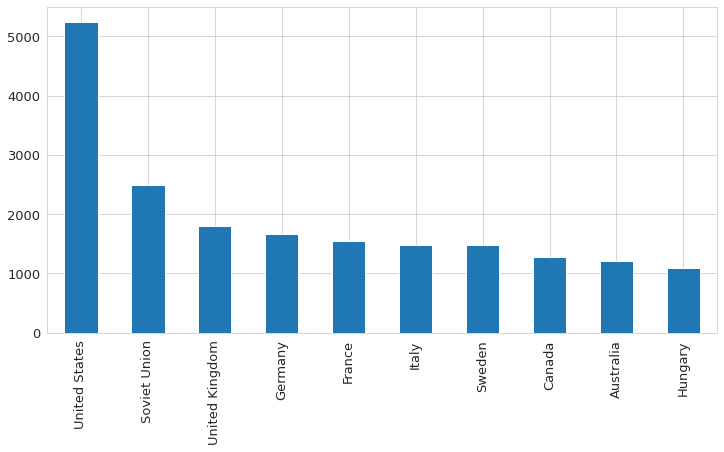

In [25]:
top_10.plot(kind = 'bar', figsize = (12,6), fontsize = 13)
plt.show()

Wszystkie rekordy dotyczące 10 najlepszych krajów.

In [26]:
olympics_10 = olympics[olympics.Country_name.isin(top_10.index)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_name
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


Splotowanie sumy zdobytych medali przez poszczególne kraje na przestrzeni lat.

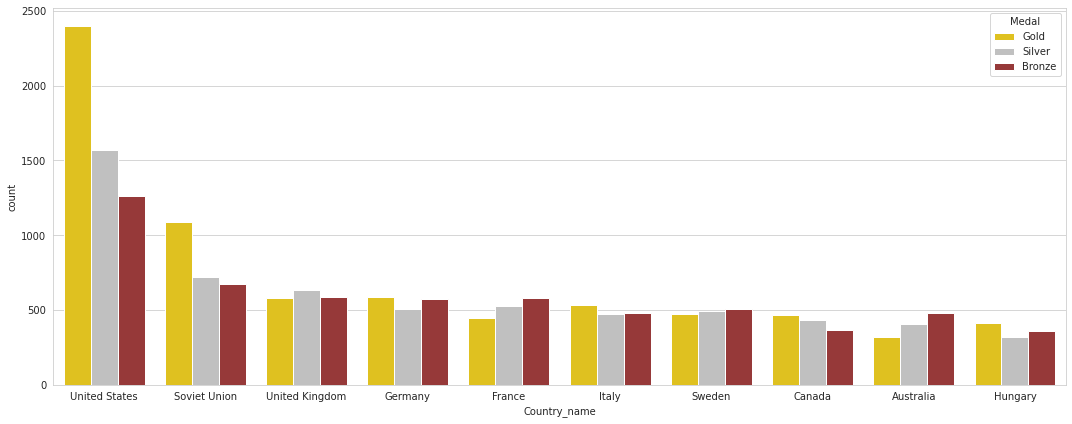

In [27]:
plt.figure(figsize = (15,6))
sns.countplot(data = olympics_10, x = 'Country_name',
              order = top_10.index, hue = 'Medal',
              hue_order = ['Gold', 'Silver', 'Bronze' ],
              palette = ['Gold', 'Silver', 'Brown'])
plt.tight_layout()
plt.show()

## Agregacja danych i heatmap'y.
**Wojciech Kubak**

In [28]:
edition_olympics = pd.crosstab(index = olympics.Country_name, columns = olympics.Edition)
edition_olympics

Edition,Summer,Winter
Country_name,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [29]:
gender_olympics = pd.crosstab(index = olympics.Country_name, columns = olympics.Gender)
gender_olympics

Gender,Men,Women
Country_name,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [30]:
medals = pd.concat([edition_olympics, gender_olympics], axis = 1)
medals

,Summer,Winter,Men,Women
Country_name,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [31]:
medals['Total'] = medals.Summer + medals.Winter
medals.sort_values('Total', ascending = False, inplace = True)
medals

,Summer,Winter,Men,Women,Total
Country_name,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [32]:
ranks_50 = medals.rank(ascending = False, method = 'average').head(50)

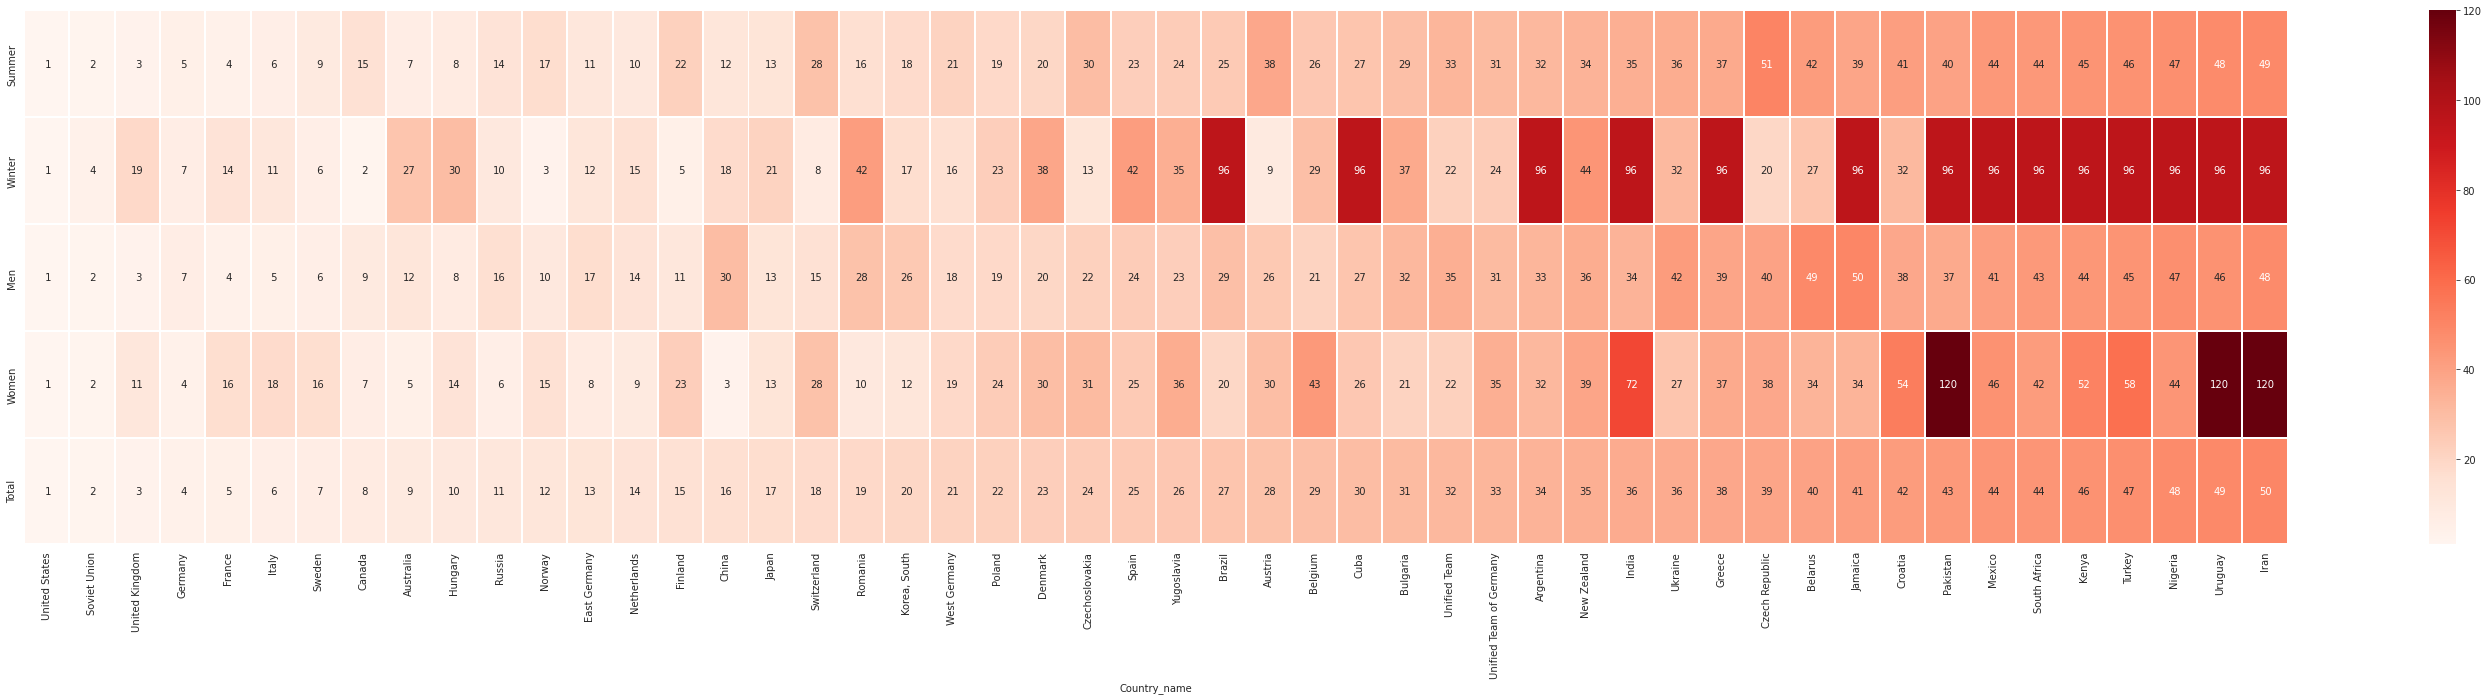

In [33]:
plt.figure(figsize = (40,10))
sns.heatmap(ranks_50.T, annot = True, fmt = '2.0f', cmap = 'Reds', linewidths = 1)
sns.set(font_scale = 1.3)
plt.tight_layout()
plt.show()

## Czy tradycja ma znaczenie?
**Wojciech Harmata**

In [34]:
sports = olympics.Sport.value_counts().index
sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Badminton',
       'Table Tennis', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Jeu de paume', 'Roque'],
      dtype='object')

Wybranie 20 krajów z największą ilości osiągnięć.

In [35]:
best_countries_20 = olympics.Country_name.value_counts().head(20).index
best_countries_20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object')

Utworzenie na podstawie powyższych danych tabeli krzyżowej.

In [36]:
by_sport = pd.crosstab(index = olympics.Country_name, columns = olympics.Sport)
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
West Indies Federation,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


Posortowanie utworzonego obiektu od najlepszej do najgorszej.

In [37]:
by_sport = by_sport.rank(ascending = False)

In [38]:
by_sport = by_sport.loc[best_countries_20, sports]
by_sport.head()

,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Jeu de paume,Roque
United States,1.00,1.00,1.00,2.00,8.00,7.00,2.00,1.00,12.00,1.00,...,3.00,1.00,9.50,74.00,73.50,73.50,74.00,74.00,2.00,1.00
Soviet Union,4.00,3.00,7.00,1.00,5.00,4.00,5.00,3.00,11.00,4.00,...,74.50,74.50,79.00,74.00,73.50,73.50,74.00,74.00,74.00,73.50
United Kingdom,10.50,2.00,2.00,19.00,34.50,15.00,10.00,20.00,5.00,16.00,...,2.00,2.00,5.00,1.50,1.00,73.50,1.00,74.00,1.00,73.50
Germany,5.00,7.00,5.00,16.00,6.00,6.00,13.00,7.50,4.00,9.00,...,74.50,74.50,5.00,74.00,73.50,73.50,74.00,74.00,74.00,73.50
France,14.00,8.00,11.00,17.00,10.00,2.00,79.50,23.00,83.00,17.00,...,74.50,74.50,79.00,1.50,73.50,1.00,2.00,1.50,74.00,73.50


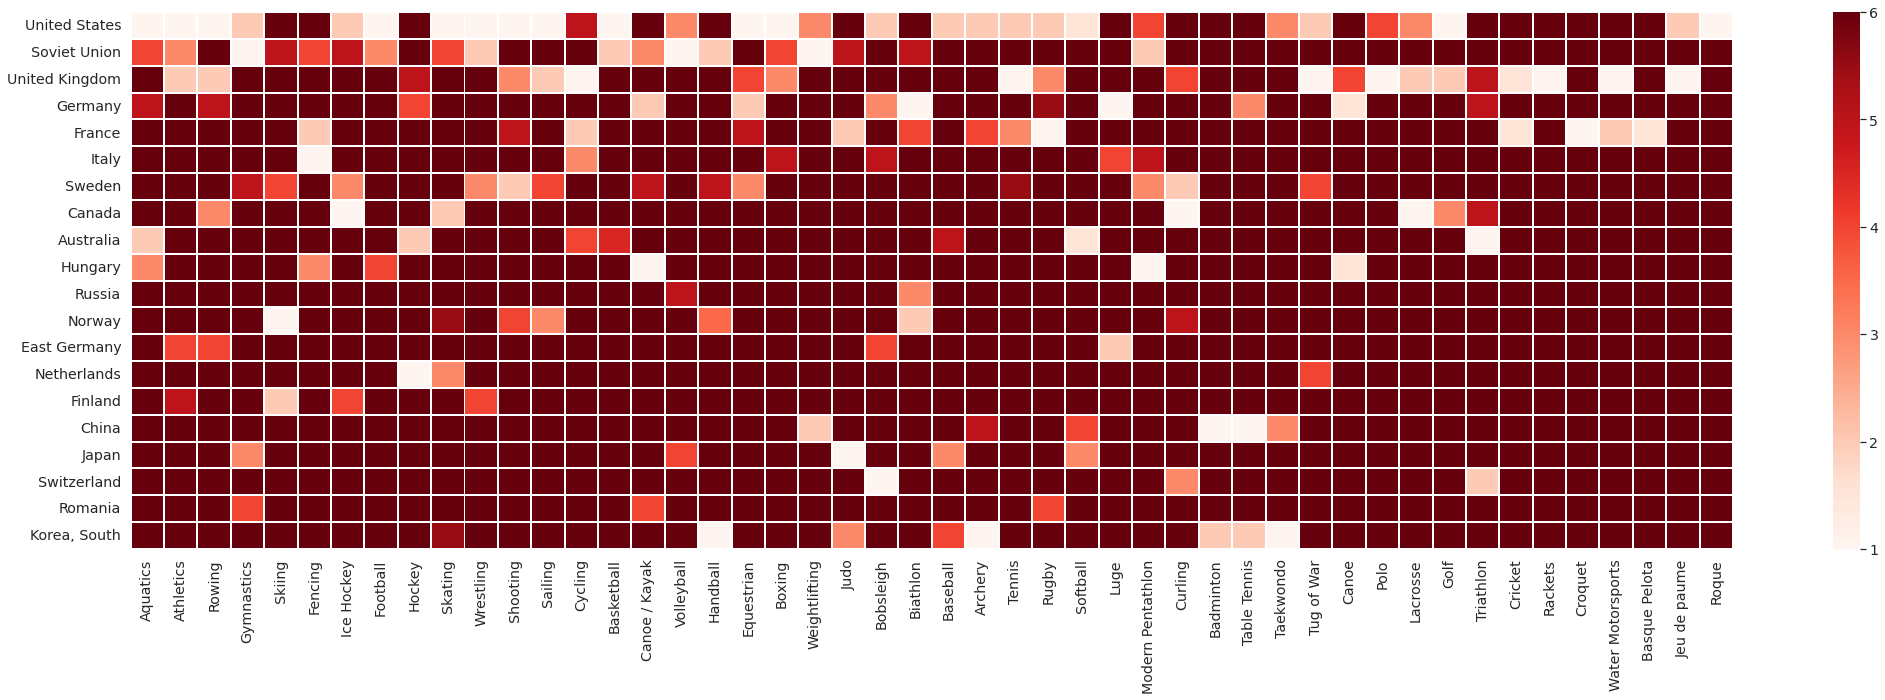

In [39]:
plt.figure(figsize = (30,10))
sns.heatmap(by_sport, cmap = 'Reds', vmin = 1, vmax = 6, linewidth = 1)
sns.set(font_scale = 1.3)
plt.tight_layout()
plt.show()